# **6️⃣ Vanishing Gradient Problem: Explanation, Mitigations, and Code Examples 🤖📉🔥**

## **💡 Real-Life Analogy: A Football Coach Losing Signal Through the Ranks ⚽📡**

Imagine a football team where a strategy is communicated from the head coach down through a chain of assistant coaches.  
• If each coach **passes on the message with only 90% fidelity** (i.e., some information is lost at every step),  
• After many layers, the players at the bottom receive a **whispered, nearly unintelligible version** of the original plan. 😵  
• **This loss in message clarity is similar to the vanishing gradient problem** in deep neural networks, where gradients (the “signal” for learning) become exponentially small as they are backpropagated through many layers.

## **📌 What Is the Vanishing Gradient Problem?**

✅ In deep neural networks, during **backpropagation**, the gradients used to update weights are computed by multiplying many derivative terms (via the **chain rule**).  
✅ If the activation function’s derivative is small (e.g., for the **sigmoid** function, the derivative is always < 0.25), the product of many such terms shrinks **exponentially**, causing gradients in earlier layers to **vanish** (i.e., become very close to zero).  
✅ **Consequence**:  
- Early layers learn very slowly or not at all.  
- The network struggles to capture low-level features, leading to poor training performance. 😟

## **📊 Mathematical Insight**

Consider a deep network with $ L $ layers. The gradient at layer $ l $ is roughly given by:  
$$
\frac{\partial L}{\partial W^{(l)}} \propto \prod_{i=l}^{L} \sigma'(z^{(i)})
$$
• For the **sigmoid function**,  
  $$
  \sigma(z) = \frac{1}{1+e^{-z}}, \quad \sigma'(z) = \sigma(z)(1-\sigma(z)) \leq 0.25
  $$
• After $ L $ layers, the gradient magnitude is at most $ 0.25^{L-l+1} $, which **vanishes exponentially** as $ L $ increases.

## **⚙️ Mitigation Strategies**

✅ **Use ReLU (Rectified Linear Unit) Activation**:  
- **ReLU**: $ f(x) = \max(0, x) $  
- Its derivative is 1 for positive inputs, **preserving gradients** better than sigmoid. ⚡

✅ **Proper Weight Initialization**:  
- Techniques like **Xavier/Glorot** or **He initialization** help maintain a healthy gradient flow through layers.

✅ **Batch Normalization**:  
- Normalizes layer inputs, which can reduce gradient vanishing and speed up training. 📊

✅ **Residual Connections (ResNets)**:  
- Allow gradients to flow directly through layers, bypassing some transformations. 🔗

✅ **Use of LSTM/GRU in Recurrent Networks**:  
- Special architectures designed to mitigate vanishing gradients in sequence models.

## **📈 Visualization: Simulating Gradient Flow Through Layers**

Below is a Python example that simulates how gradients propagate through many layers using sigmoid vs. ReLU activations. We assume a constant input to each activation for simplicity.

### **Python Code for Gradient Simulation**

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Activation functions and their derivatives
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_deriv(x):
    s = sigmoid(x)
    return s * (1 - s)

def relu(x):
    return np.maximum(0, x)

def relu_deriv(x):
    return np.where(x > 0, 1, 0)

def simulate_gradients(activation_deriv, n_layers, input_value):
    """
    Simulate the product of derivatives (gradients) through n_layers.
    
    Parameters:
        activation_deriv (function): Derivative function of the activation.
        n_layers (int): Number of layers.
        input_value (float): Input to activation function (assumed constant across layers).
    
    Returns:
        List of gradient magnitudes at each layer.
    """
    grads = [1.0]  # start with gradient = 1
    for i in range(n_layers):
        grad = grads[-1] * activation_deriv(input_value)
        grads.append(grad)
    return grads

In [4]:
n_layers = 20
# Assume input value is 1.0 (which for sigmoid gives derivative ~ sigmoid(1)*(1-sigmoid(1)))
sig_gradients = simulate_gradients(sigmoid_deriv, n_layers, 1.0)
# For ReLU, if input > 0, derivative is 1, so gradients remain 1
relu_gradients = simulate_gradients(lambda x: 1.0, n_layers, 1.0)


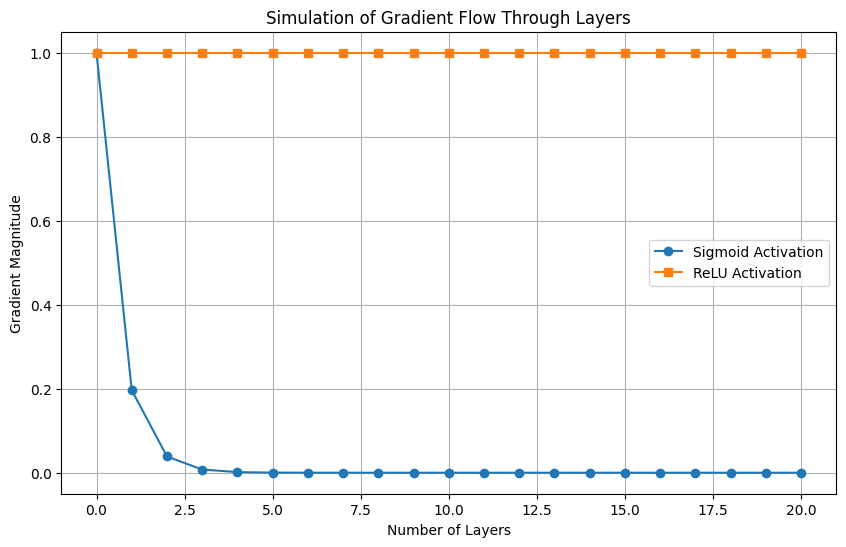

In [5]:

# Plot the gradients across layers
plt.figure(figsize=(10,6))
plt.plot(range(n_layers+1), sig_gradients, marker='o', label="Sigmoid Activation")
plt.plot(range(n_layers+1), relu_gradients, marker='s', label="ReLU Activation")
plt.xlabel("Number of Layers")
plt.ylabel("Gradient Magnitude")
plt.title("Simulation of Gradient Flow Through Layers")
plt.legend()
plt.grid(True)
plt.show()

### **Expected Output & Interpretation:**



- **Sigmoid Gradients:**  
  The gradient starts at `1.0` and then decays rapidly with each layer. For example, after the first layer, it drops to approximately `0.1966`, then to `0.03866` after the second layer, and continues decreasing until it reaches around `7.45e-15` after 20 layers. This exponential decay demonstrates the vanishing gradient problem: as the number of layers increases, the gradients become extremely small, making it difficult for the early layers in a deep network to learn effectively.

- **ReLU Gradients:**  
  In contrast, the ReLU gradients remain constant at `1.0` for every layer. This stability means that the gradient signal is preserved throughout the network, which is why ReLU is often preferred in deep architectures.

## **📊 Real-Life Sports Examples Using GANs and Deep Networks**

### **(A) Football Example ⚽: Predicting Match Outcomes**

- **Scenario**: A deep network with many layers is used to predict match outcomes from complex features (e.g., player positions, ball trajectories).  
- **Problem**: If using sigmoid activations, the **vanishing gradient** can prevent early layers (that capture low-level spatial features) from learning effectively.  
- **Mitigation**: Using **ReLU activations** and **batch normalization** ensures that gradients remain robust, allowing the model to learn both low-level and high-level features.  
- **Visual**: Imagine the network is like a well-coordinated team where every player receives clear instructions (good gradients), instead of a whisper that fades out.

### **(B) NBA Example 🏀: Video Analysis for Player Actions**

- **Scenario**: A deep CNN is used to analyze video footage and classify player actions (e.g., dribbling, shooting, passing).  
- **Problem**: Using traditional activation functions may cause the model to **struggle in deeper layers** that capture complex motion features.  
- **Mitigation**: Replacing sigmoids with ReLU (or its variants like Leaky ReLU) maintains gradient strength, ensuring the network learns subtle temporal and spatial patterns.  
- **Visual**: Think of it as ensuring that the camera feed (data signal) remains clear and vibrant throughout a long game, without fading.

### **(C) Texas Hold’em Poker ♠️♥️: Strategy Simulation**

- **Scenario**: A deep reinforcement learning model analyzes historical hand data to optimize betting strategies.  
- **Problem**: If the network suffers from vanishing gradients, it may fail to learn long-term dependencies in the game strategy.  
- **Mitigation**: Advanced architectures (such as LSTMs or Transformers with gating mechanisms) are used, which include techniques like **ReLU and residual connections** to avoid vanishing gradients.  
- **Visual**: It’s like having a poker pro who remembers and processes long sequences of betting patterns clearly, ensuring strategic decisions are informed by a rich history of game data.

## **🚀 Final Takeaways**

1. **Vanishing Gradient Problem**: In deep networks using activations like sigmoid, gradients can shrink exponentially during backpropagation, hindering learning in earlier layers. 😱📉  
2. **Mitigation Strategies**:  
   - **ReLU Activation**: Keeps gradients constant for positive inputs. 🚀  
   - **Proper Initialization & Batch Normalization**: Helps maintain gradient magnitude. 🔥  
   - **Residual Connections**: Allow gradients to flow directly through layers. 🔗  
3. **Real-Life Impact**:  
   - In **Football analytics**, ensuring early layers learn effectively means better detection of subtle gameplay patterns. ⚽  
   - In **NBA video analysis**, robust gradients lead to improved action recognition in deep networks. 🏀  
   - In **Poker strategy simulation**, advanced architectures mitigate vanishing gradients to capture long-term dependencies. ♠️♥️